In [1]:
from __future__ import absolute_import
from __future__ import unicode_literals
from __future__ import division
from __future__ import print_function

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
from sklearn.utils import resample
from joblib import dump, load

%matplotlib inline
sns.set(style='ticks')

In [2]:
path = 'data'
df = pd.read_csv(path + "/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Heatmap

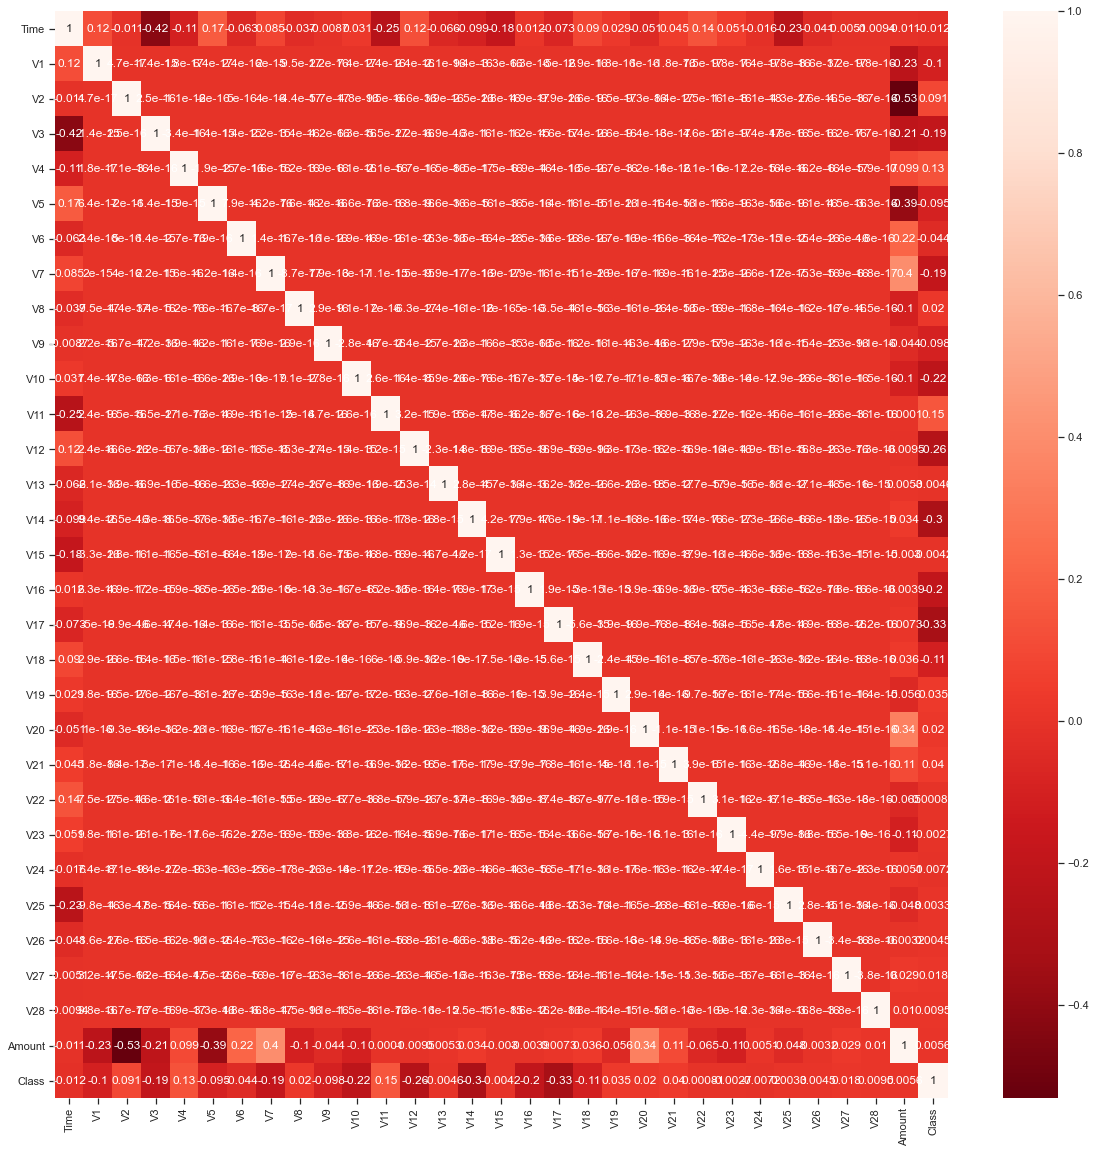

In [6]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds_r)
plt.show()

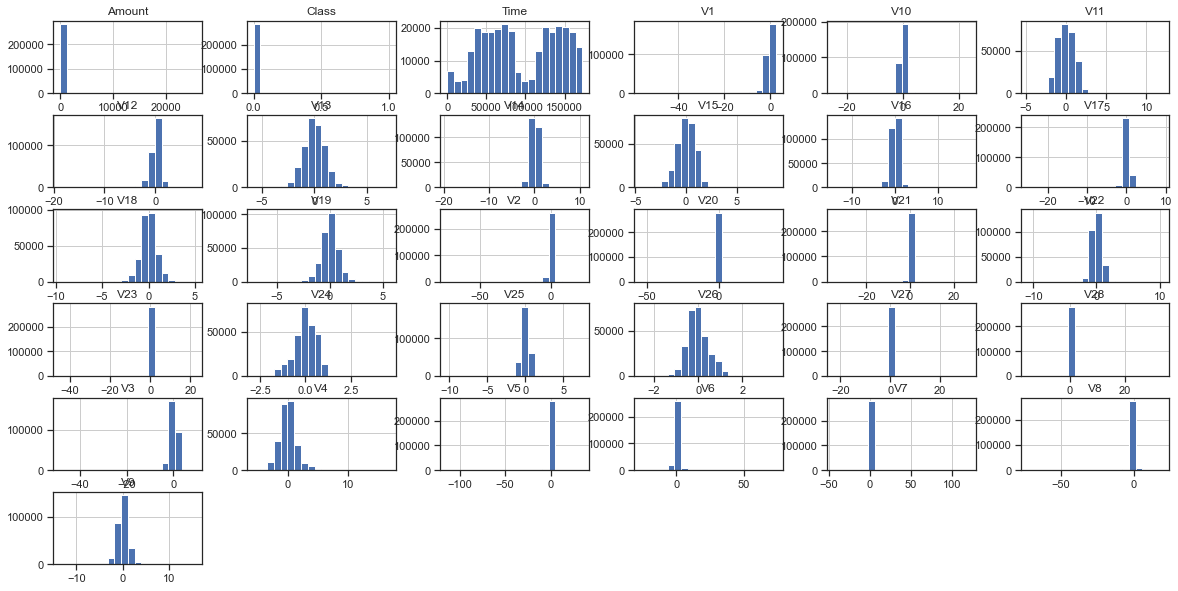

In [7]:
df.hist(bins=20, figsize=(20, 10))
plt.show()

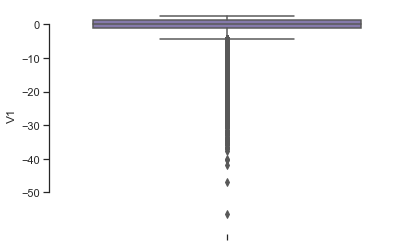

In [8]:
## mendeteksi outlier menggunakan boxplot
## dengan contoh "V1"

sns.boxplot(y='V1', hue='Class', data=df, palette=['m','g'])
sns.despine(offset=10, trim=True)

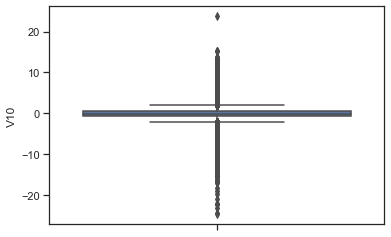

In [9]:
## V10
sns.boxplot(y=df['V10'])

## remove outlier

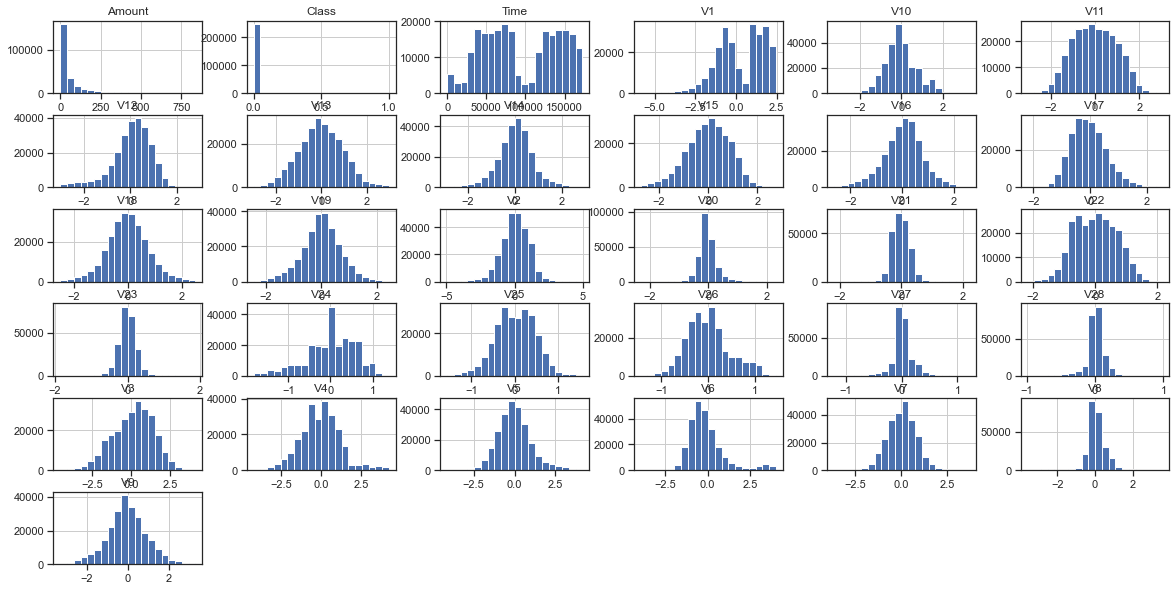

In [10]:
z_score = np.abs(stats.zscore(df.drop(['Time', 'Class'], axis=1)))

df_no_outlier = df[((z_score < 3).all(axis=1)) & ((z_score > -3).all(axis=1))]
df_no_outlier.hist(bins=20, figsize=(20, 10))
plt.show()

0    246943
1        48
Name: Class, dtype: int64


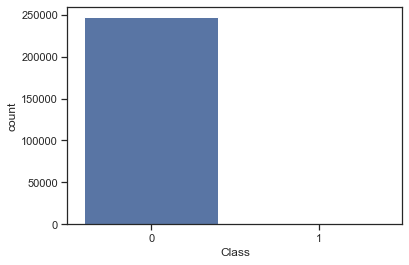

In [11]:
print(df_no_outlier['Class'].value_counts())
sns.countplot(df_no_outlier['Class'])
plt.show()

## Feature Selection

### Using Anova

In scikit learn using function 'f_classif'

In [12]:
def feature_selection(X, y, func):
    fs = SelectKBest(score_func=func, k='all')
    fs.fit(X, y)
    select = fs.transform(X)
    
    cols = list(X.columns)
    
    temp = []
    selected_features = []
    
    for i in range(len(fs.scores_)):
        temp.append(fs.scores_[i])
        
    score_min = np.mean(temp)
    
    for i in range(len(fs.scores_)):
        if fs.scores_[i] >= score_min:
            print(f'Features Selected {cols[i]} : {fs.scores_[i]}')
            selected_features.append(cols[i])
            
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()
    
    return selected_features

Features Selected V4 : 67.35749271958204
Features Selected V7 : 11.260191155967684
Features Selected V8 : 10.642756494109054
Features Selected V14 : 54.409978533577515
Features Selected V17 : 60.21443677312165
Features Selected V18 : 14.256115944854859
Features Selected V19 : 9.86536554621786
Features Selected Amount : 10.174908222893272


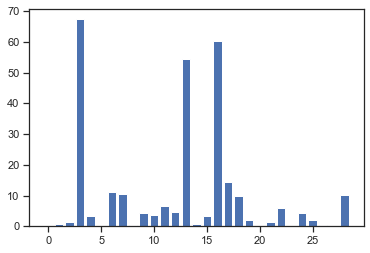

In [13]:
X = df_no_outlier.drop(['Time','Class'], axis=1)
y = df_no_outlier['Class'].values

features_imbalance = feature_selection(X, y, f_classif)

In [14]:
X = df_no_outlier[features_imbalance]
y = df_no_outlier['Class'].values
X

,V4,V7,V8,V14,V17,V18,V19,Amount
0,1.378155,0.239599,0.098698,-0.311169,0.207971,0.025791,0.403993,149.62
1,0.448154,-0.078803,0.085102,-0.143772,-0.114805,-0.183361,-0.145783,2.69
3,-0.863291,0.237609,0.377436,-0.287924,-0.684093,1.965775,-1.232622,123.50
4,0.403034,0.592941,-0.270533,-1.119670,-0.237033,-0.038195,0.803487,69.99
5,-0.168252,0.476201,0.260314,-0.137134,-0.058133,0.068653,-0.033194,3.67
...,...,...,...,...,...,...,...,...
284800,0.234580,0.017050,-0.118228,0.626211,-0.605252,-0.163049,0.561695,2.68
284801,-0.745097,0.812722,0.115093,-0.731707,0.070441,0.373110,0.128904,2.69
284803,-0.738589,0.024330,0.294869,-0.675143,-0.025693,-1.221179,-1.545556,24.79
284804,-0.557828,-0.296827,0.708417,-0.510602,0.313502,0.395652,-0.577252,67.88


## Train Model

### Logistic Regression

In [15]:
model = LogisticRegression()
cv = StratifiedKFold(n_splits=5, random_state=42)
params = {
    'penalty':['l1', 'l2'],
    'C': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
    'tol':[1.0, 0.1, 0.001, 0.0001, 0.00001]
}

def fine_tune_model(model, X, y, params, cv):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    grid = GridSearchCV(model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid.fit(X, y)
    
    return grid

model_tune = fine_tune_model(model, X, y, params, cv)
    

C:\Users\acer\Anaconda3\envs\python\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [16]:
model_tune.best_params_

{'C': 0.1, 'penalty': 'l2', 'tol': 1.0}

In [17]:
result = model_tune.cv_results_
for params, mean, std, rank in zip(result['params'], result['mean_test_score'], result['std_test_score'], result['rank_test_score']):
    print(f'{params}\t{mean}\t{std}\t{rank}')

{'C': 10.0, 'penalty': 'l1', 'tol': 1.0}	nan	nan	60
{'C': 10.0, 'penalty': 'l1', 'tol': 0.1}	nan	nan	39
{'C': 10.0, 'penalty': 'l1', 'tol': 0.001}	nan	nan	43
{'C': 10.0, 'penalty': 'l1', 'tol': 0.0001}	nan	nan	58
{'C': 10.0, 'penalty': 'l1', 'tol': 1e-05}	nan	nan	57
{'C': 10.0, 'penalty': 'l2', 'tol': 1.0}	0.8777356529004589	0.046501030885532986	16
{'C': 10.0, 'penalty': 'l2', 'tol': 0.1}	0.8774170512880431	0.047126885790782655	17
{'C': 10.0, 'penalty': 'l2', 'tol': 0.001}	0.8774114728589376	0.047195139727328035	18
{'C': 10.0, 'penalty': 'l2', 'tol': 0.0001}	0.8774114728589376	0.047195139727328035	18
{'C': 10.0, 'penalty': 'l2', 'tol': 1e-05}	0.8774114728589376	0.047195139727328035	18
{'C': 1.0, 'penalty': 'l1', 'tol': 1.0}	nan	nan	56
{'C': 1.0, 'penalty': 'l1', 'tol': 0.1}	nan	nan	55
{'C': 1.0, 'penalty': 'l1', 'tol': 0.001}	nan	nan	49
{'C': 1.0, 'penalty': 'l1', 'tol': 0.0001}	nan	nan	48
{'C': 1.0, 'penalty': 'l1', 'tol': 1e-05}	nan	nan	47
{'C': 1.0, 'penalty': 'l2', 'tol': 1.0}	0.87

In [18]:
dump(model_tune.best_estimator_,'best_estimator_for_imbalance_data.joblib')

['best_estimator_for_imbalance_data.joblib']

### train model on balanced data using resample

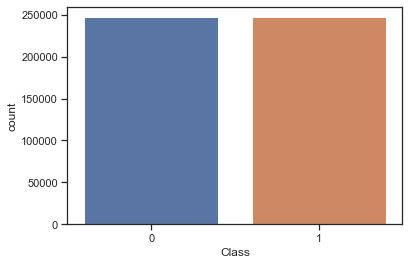

1    246943
0    246943
Name: Class, dtype: int64


In [19]:
df_temp = df_no_outlier.copy()

not_fraud = df_temp[df_temp['Class']==0]
fraud = df_temp[df_temp['Class']==1]

fraud_resampled = resample(fraud, replace=True,
                          n_samples = len(not_fraud),
                          random_state=42)
df_balance_data = pd.concat([not_fraud, fraud_resampled])
df_balance_data = df_balance_data.sample(frac=1)  # shuffling dataframe

sns.countplot(df_balance_data['Class'])
plt.show()
print(df_balance_data['Class'].value_counts())

In [20]:
df_balance_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118308,75033.0,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,30.14,1
86011,61044.0,0.309192,-2.165938,0.303532,-0.849755,-1.934657,-0.783394,-0.064026,-0.120886,2.030423,...,0.269504,-0.161361,-0.440688,0.432501,0.144473,-0.076330,-0.055002,0.110130,500.00,0
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00,1
257065,157986.0,0.147052,1.083040,-0.402870,-0.553269,0.972539,-0.803216,1.031770,-0.149295,-0.150102,...,-0.334344,-0.783633,0.089315,0.577336,-0.393884,0.111354,0.226050,0.085689,5.55,0
204079,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51,1


Features Selected V4 : 149945.06505103776
Features Selected V7 : 24233.503641504627
Features Selected V8 : 28344.11075604305
Features Selected V14 : 93068.32927722715
Features Selected V17 : 105348.00011185587
Features Selected V18 : 46122.707118662096


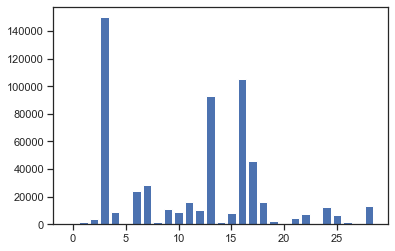

In [21]:
X = df_balance_data.drop(['Time', 'Class'], axis=1)
y = df_balance_data['Class'].values

features_balance = feature_selection(X, y, f_classif)

In [22]:
X = df_balance_data[features_balance]
y = df_balance_data['Class'].values

cv = KFold(n_splits=5, random_state=42)
params = {
    'penalty':['l1', 'l2'],
    'C': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
    'tol':[1.0, 0.1, 0.001, 0.0001, 0.00001]
}

model_tune = fine_tune_model(model, X, y, params, cv)

C:\Users\acer\Anaconda3\envs\python\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [23]:
result = model_tune.cv_results_
for params, mean, std, rank in zip(result['params'], result['mean_test_score'], result['std_test_score'], result['rank_test_score']):
    print(f'{params}\t{mean}\t{std}\t{rank}')

{'C': 10.0, 'penalty': 'l1', 'tol': 1.0}	nan	nan	60
{'C': 10.0, 'penalty': 'l1', 'tol': 0.1}	nan	nan	40
{'C': 10.0, 'penalty': 'l1', 'tol': 0.001}	nan	nan	39
{'C': 10.0, 'penalty': 'l1', 'tol': 0.0001}	nan	nan	38
{'C': 10.0, 'penalty': 'l1', 'tol': 1e-05}	nan	nan	32
{'C': 10.0, 'penalty': 'l2', 'tol': 1.0}	0.8998440849635534	0.00042111439012661433	21
{'C': 10.0, 'penalty': 'l2', 'tol': 0.1}	0.8998440849635534	0.00042111439012661433	21
{'C': 10.0, 'penalty': 'l2', 'tol': 0.001}	0.8998440849635534	0.00042111439012661433	21
{'C': 10.0, 'penalty': 'l2', 'tol': 0.0001}	0.8998440849635534	0.00042111439012661433	21
{'C': 10.0, 'penalty': 'l2', 'tol': 1e-05}	0.8998440849635534	0.00042111439012661433	21
{'C': 1.0, 'penalty': 'l1', 'tol': 1.0}	nan	nan	58
{'C': 1.0, 'penalty': 'l1', 'tol': 0.1}	nan	nan	57
{'C': 1.0, 'penalty': 'l1', 'tol': 0.001}	nan	nan	56
{'C': 1.0, 'penalty': 'l1', 'tol': 0.0001}	nan	nan	55
{'C': 1.0, 'penalty': 'l1', 'tol': 1e-05}	nan	nan	49
{'C': 1.0, 'penalty': 'l2', 'tol':

In [24]:
model_tune.best_params_

{'C': 0.0001, 'penalty': 'l2', 'tol': 1.0}

In [25]:
dump(model_tune.best_estimator_,'best_estimator_for_balance_data.joblib')

['best_estimator_for_balance_data.joblib']

## Testing

In [26]:
def testing(estimator, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    
    print('Score Train :', estimator.score(X_train, y_train))
    print('Score Test :', estimator.score(X_test, y_test))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
    print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
    
    data = {'True':y_test, 'Predictions':y_pred}

    df = pd.DataFrame(data=data)
    print(df.head())

def testing_manual(X, y, imbalance=True):
    if imbalance:
        model = LogisticRegression(C=0.1, penalty='l2',tol=1.0)
    else:
        model = LogisticRegression(C=0.0001, penalty='l2', tol=1.0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)   
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Score Train :', model.score(X_train, y_train))
    print('Score Test :', model.score(X_test, y_test))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
    print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
    
    data = {'True':y_test, 'Predictions':y_pred}

    df = pd.DataFrame(data=data)
    print(df.head())
    

### Imbalance data

In [27]:
estimator_imbalance = load('best_estimator_for_imbalance_data.joblib')
X = df_no_outlier[features_imbalance]
y = df_no_outlier['Class'].values


testing(estimator_imbalance, X, y)
print('\nManual testing')
testing_manual(X, y)


Score Train : 0.9998178063889226
Score Test : 0.999757080102836
Accuracy: 0.999757080102836
Confusion Matrix: 
 [[49387     0]
 [   12     0]]
ROC AUC: 0.5
   True  Predictions
0     0            0
1     0            0
2     0            0
3     0            0
4     0            0

Manual testing
Score Train : 0.9998178063889226
Score Test : 0.999757080102836
Accuracy: 0.999757080102836
Confusion Matrix: 
 [[49387     0]
 [   12     0]]
ROC AUC: 0.5
   True  Predictions
0     0            0
1     0            0
2     0            0
3     0            0
4     0            0


### Balance data

In [28]:
estimator_balance= load('best_estimator_for_balance_data.joblib')
X = df_balance_data[features_balance]
y = df_balance_data['Class'].values

testing(estimator_balance, X, y)
print('\nManual testing')
testing_manual(X, y, imbalance=False)


Score Train : 0.8175840529677961
Score Test : 0.8170544048269858
Accuracy: 0.8170544048269858
Confusion Matrix: 
 [[41697  7726]
 [10345 39010]]
ROC AUC: 0.8170360655511354
   True  Predictions
0     1            1
1     1            1
2     0            0
3     0            1
4     1            1

Manual testing
Score Train : 0.8175840529677961
Score Test : 0.8170544048269858
Accuracy: 0.8170544048269858
Confusion Matrix: 
 [[41697  7726]
 [10345 39010]]
ROC AUC: 0.8170360655511354
   True  Predictions
0     1            1
1     1            1
2     0            0
3     0            1
4     1            1


## Experimental
### using model balance data but data from imbalance data

In [29]:
estimator_balance= load('best_estimator_for_balance_data.joblib')
X = df_no_outlier[features_imbalance]
y = df_no_outlier['Class'].values

testing(estimator_balance, X, y)
print('\nManual testing')
testing_manual(X, y, imbalance=False)

Score Train : 0.9998178063889226
Score Test : 0.999757080102836
Accuracy: 0.999757080102836
Confusion Matrix: 
 [[49387     0]
 [   12     0]]
ROC AUC: 0.5
   True  Predictions
0     0            0
1     0            0
2     0            0
3     0            0
4     0            0

Manual testing
Score Train : 0.9998178063889226
Score Test : 0.999757080102836
Accuracy: 0.999757080102836
Confusion Matrix: 
 [[49387     0]
 [   12     0]]
ROC AUC: 0.5
   True  Predictions
0     0            0
1     0            0
2     0            0
3     0            0
4     0            0


### using model imbalance data but data from balance data

In [30]:
estimator_imbalance = load('best_estimator_for_imbalance_data.joblib')

X = df_balance_data[features_balance]
y = df_balance_data['Class'].values

testing(estimator_imbalance, X, y)
print('\nManual testing')
testing_manual(X, y)

Score Train : 0.8149619850774978
Score Test : 0.8144829820405354
Accuracy: 0.8144829820405354
Confusion Matrix: 
 [[41443  7980]
 [10345 39010]]
ROC AUC: 0.8144664117462267
   True  Predictions
0     1            1
1     1            1
2     0            0
3     0            1
4     1            1

Manual testing
Score Train : 0.8149619850774978
Score Test : 0.8144829820405354
Accuracy: 0.8144829820405354
Confusion Matrix: 
 [[41443  7980]
 [10345 39010]]
ROC AUC: 0.8144664117462267
   True  Predictions
0     1            1
1     1            1
2     0            0
3     0            1
4     1            1
